# NYC TLC Trip Record Analysis

## Introduction
The goal of this analysis is to explore the NYC taxi trip data to uncover insights about taxi usage patterns, peak times, and trip duration. These insights can help with operational decision-making, such as optimizing driver availability.

### Business Questions
1. What are the peak times and locations for taxi pickups?
2. How does trip duration vary by time of day?
3. What are the most common routes or destinations?


In [ ]:
# Import necessary libraries
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For advanced data visualization

# Set visualization style
sns.set(style="whitegrid")      # Setting a style for Seaborn plots

# Display plots inline
%matplotlib inline


# Load the dataset
data = pd.read_csv('NYC TLC Trip Record.csv')
data


C:\Users\Admin\AppData\Local\Temp\ipykernel_22068\1075369934.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


# Cleaning Data

In [42]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [43]:
# Count missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [44]:
# Drop columns with a high percentage of missing values (like `ehail_fee`)
data.drop(columns=['ehail_fee'], inplace=True, errors='ignore')

# Drop rows with missing values in essential columns
essential_columns = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'congestion_surcharge']
data.dropna(subset=essential_columns, inplace=True)

# Impute missing values for `passenger_count` with the mode (most common value)
if 'passenger_count' in data.columns:
    data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_22068\3469801872.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)


In [45]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [46]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)


In [47]:
# Display summary statistics to identify outliers
data.describe()


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
std,0.351199,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [48]:
# Ensure the datetime columns are in datetime format
data['pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'], errors='coerce')
data['dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
data['trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

from scipy import stats  # Import the stats module for Z-score calculation

# Define your numerical columns explicitly, including trip_duration
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']

for col in numerical_cols:
    # Calculate Z-score for each value in the column
    data[f'{col}_zscore'] = stats.zscore(data[col])

    # Print outliers for this column where Z-score > 3 or < -3
    outliers = data[abs(data[f'{col}_zscore']) > 3]
    print(f"Outliers in '{col}' based on Z-score method:")
    print(outliers[[col, f'{col}_zscore']])

Outliers in 'trip_distance' based on Z-score method:
       trip_distance  trip_distance_zscore
577            27.61              3.702996
691            23.58              3.106861
1445           26.94              3.603887
2850           23.09              3.034378
4986           26.76              3.577261
...              ...                   ...
55434          24.83              3.291767
56800          28.46              3.828732
60901          23.30              3.065442
61806          23.83              3.143842
62314          48.19              6.747282

[69 rows x 2 columns]
Outliers in 'fare_amount' based on Z-score method:
       fare_amount  fare_amount_zscore
32            60.0            3.308381
43            75.0            4.438151
97            66.0            3.760289
104          190.0           13.099720
163          100.0            6.321101
...            ...                 ...
63299         67.4            3.865734
63318         70.0            4.061561
63514 

Handling Outliers
Based on the importance and context of each column, here’s a suggested approach for handling these outliers.

Step 1: Decide on Removal vs. Capping
Remove Outliers:

For columns where extreme values likely result from data errors or are irrelevant to the analysis.
For example, trip_distance with excessively high values might represent data entry errors.
Cap Outliers:

For columns where you expect variability but want to limit extreme values, such as fare_amount or tip_amount.

In [49]:
from scipy import stats

# Ensure 'passenger_count' is included in numerical columns for Z-score calculation
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration', 'passenger_count']

# Calculate Z-scores for each numerical column
for col in numerical_cols:
    data[f'{col}_zscore'] = stats.zscore(data[col])
    
# 1. Remove rows with high `trip_distance` outliers
data = data[abs(data['trip_distance_zscore']) <= 3]

# 2. Remove outliers in `passenger_count` if values above 4 are irrelevant
data = data[abs(data['passenger_count_zscore']) <= 3]

# 3. Cap outliers in `fare_amount` and `tip_amount`
# Calculate the upper bounds based on Z-score
fare_cap = data[data['fare_amount_zscore'] <= 3]['fare_amount'].max()
tip_cap = data[data['tip_amount_zscore'] <= 3]['tip_amount'].max()

# Cap values
data['fare_amount'] = data['fare_amount'].apply(lambda x: min(x, fare_cap))
data['tip_amount'] = data['tip_amount'].apply(lambda x: min(x, tip_cap))

# Drop temporary Z-score columns
data = data.drop([f'{col}_zscore' for col in numerical_cols], axis=1)

# Final preview after handling outliers
print(data.describe())


           VendorID    RatecodeID  PULocationID  DOLocationID  \
count  60977.000000  60977.000000  60977.000000  60977.000000   
mean       1.849402      1.103334     97.573561    138.262214   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    117.000000    220.000000   
max        2.000000      5.000000    265.000000    265.000000   
std        0.357659      0.626037     59.894608     76.916471   

       passenger_count  trip_distance   fare_amount         extra  \
count     60977.000000   60977.000000  60977.000000  60977.000000   
mean          1.127163       2.514564     15.682923      0.882689   
min           0.000000       0.000000    -70.000000     -2.500000   
25%           1.000000       1.100000      9.300000      0.000000   
50%           1.000000       1.790000     12.800000      0.000000   


Removed Outliers for trip_distance and passenger_count by excluding rows with extreme values.

Capped Outliers for fare_amount and tip_amount, limiting these values to a reasonable upper bound based on Z-scores.

In [50]:
# Check for trips where dropoff time is before pickup time
data['pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'], errors='coerce')
data['dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'], errors='coerce')

# Identify rows with timing issues
invalid_trips = data[data['dropoff_datetime'] < data['pickup_datetime']]
print("Number of trips with dropoff before pickup:", len(invalid_trips))


Number of trips with dropoff before pickup: 0


Converted lpep_pickup_datetime and lpep_dropoff_datetime to datetime format, handling invalid date entries with NaT for standardization.

Identified trips with timing issues where dropoff_datetime is earlier than pickup_datetime, flagging these as invalid trips for removal or correction.

In [51]:
# Remove rows with invalid datetime sequences
data = data[data['dropoff_datetime'] >= data['pickup_datetime']]



Removed rows with invalid datetime sequences by excluding trips where dropoff_datetime is earlier than pickup_datetime.

In [52]:
# Preview the cleaned data
print(data.head())
print(data.info())


   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0 

# Analyze Temporal Patterns
### Objective 
Identify when demand is highest by analyzing trip counts over time (by hour, day, or month).

Code and Explanation
Extracting Time Components:

Here, we extract the hour of the day, day of the week, and month from the pickup_datetime to analyze trends by time./

In [53]:
# Convert pickup datetime to datetime format if needed (skip if already converted)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract hour, day, and month from pickup datetime
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['pickup_month'] = data['pickup_datetime'].dt.month

Plotting Taxi Pickups by Hour of the Day:

This plot shows how many pickups occur at each hour. It helps identify daily patterns, such as when demand starts rising and when it peaks.

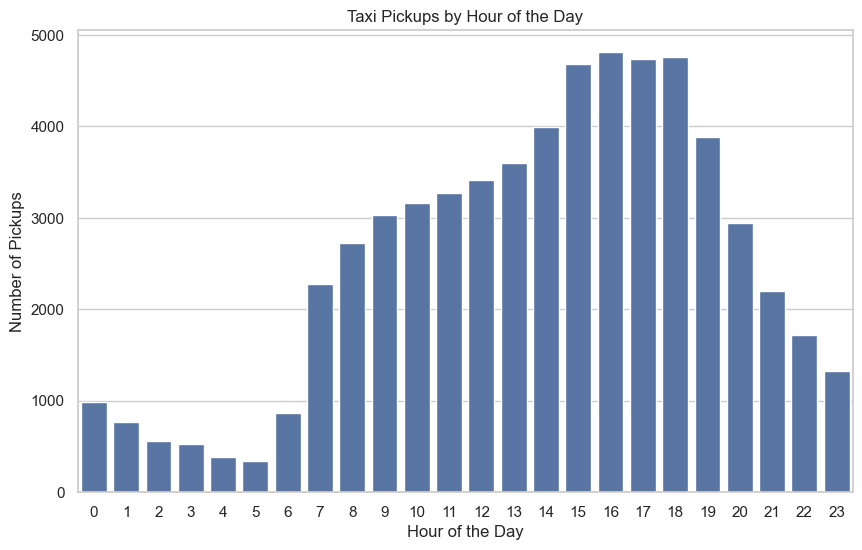

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pickups by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=data)
plt.title("Taxi Pickups by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.show()


### Explanation:

sns.countplot: Creates a bar chart showing the count of pickups for each hour. The x parameter specifies the hour (pickup_hour), and data is the dataset.
Plot Customization: Titles and labels are added for clarity.

Plotting Taxi Pickups by Day of the Week:

This plot displays the number of pickups for each day of the week. It helps identify if there are specific days with higher or lower demand.

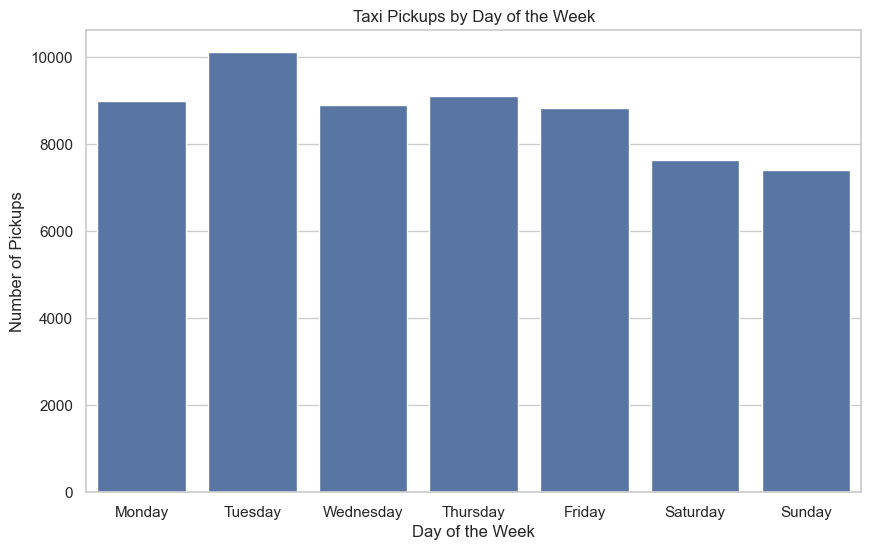

In [55]:
# Plot pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day', data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Taxi Pickups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.show()


### Explanation:

sns.countplot with order: This creates a bar plot for each day of the week. Using order ensures the days appear in sequential order from Monday to Sunday.

Plot Customization: Titles and labels clarify what the plot represents.

## Insights
1. Peak Hours: The highest demand occurs in the afternoon between 3 PM and 6 PM on weekdays. This aligns with commuting and work-related travel patterns.
2. Off-Peak Hours: Late nights and early mornings (12 AM to 6 AM) have the lowest demand.
3. High-Demand Days: Tuesday is the busiest day, followed closely by other weekdays, while weekends (Saturday and Sunday) see lower activity.

## Potential Actions
1. Resource Allocation: Increase taxi availability during weekday peak hours (3 PM to 6 PM) and consider reducing it during low-demand periods (late night and early morning).
2. Promotions for Weekends: Consider offering discounts or promotions to encourage more weekend travel and balance the weekly demand.
3. Targeted Marketing: Focus marketing efforts on weekday commuters, as they seem to be the primary users.

# Analyze Trip Duration #
### Objective 
The purpose of this analysis is to determine the most common trip durations. This can help identify whether rides are typically short commutes or longer journeys, which is useful for understanding the nature of demand and optimizing pricing or service availability.

### Explanation of Code

Calculate Trip Duration:

We calculate the duration of each trip by finding the difference between dropoff_datetime and pickup_datetime.
The result is converted from seconds to minutes by dividing by 60.
Plot Distribution:

A histogram with a KDE (Kernel Density Estimate) overlay is used to visualize the distribution of trip durations.
Limiting to 60 Minutes: We restrict the x-axis to 60 minutes to focus on the majority of trips, assuming most taxi rides are likely under an hour. If there are longer trips, we can analyze them separately if they form a significant portion of the data.

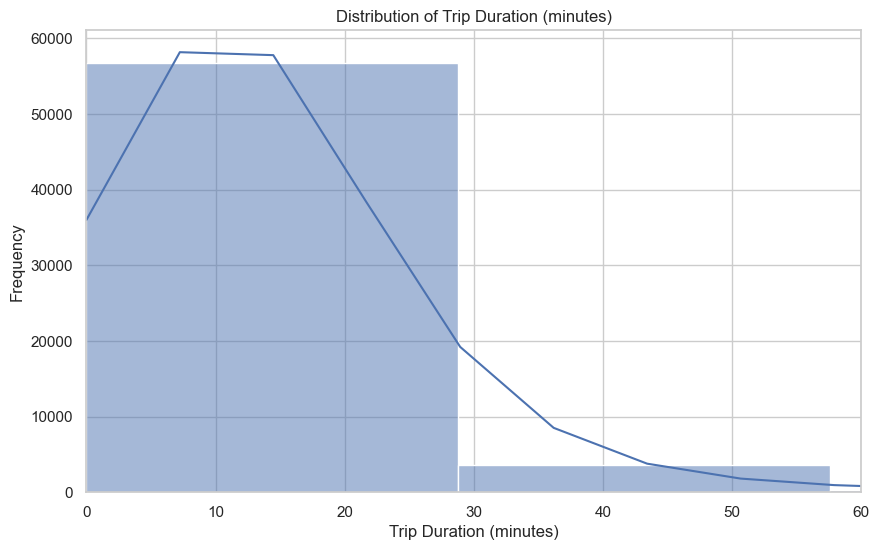

In [56]:
# Calculate trip duration in minutes
data['trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

# Plot distribution of trip duration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['trip_duration'], bins=50, kde=True)
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)  # Limit to trips up to 60 minutes for better visualization
plt.show()


### Observations

Peak Duration:

The chart shows a clear peak around 10 minutes. This suggests that most trips fall within a relatively short duration, likely representing quick local journeys within a small radius.
Short-Duration Trips:

A large number of trips have durations between 5 and 15 minutes. This indicates that the majority of taxi rides are short trips, which is typical for city-based taxi services where people use taxis for brief commutes or errands.
Decline Beyond 15 Minutes:

There’s a sharp drop in the frequency of trips after the 15-minute mark, with the frequency continuing to decrease as the duration increases.
Very few trips extend beyond 30 minutes, with an almost negligible number approaching 60 minutes.
Longer Trips as Outliers:

The longer trips (over 30 minutes) are rare and may represent specific use cases like airport or suburban trips, or they might be outliers in the dataset.

### Insights
Typical Use Case: The concentration of trips around 5–15 minutes suggests that taxis are primarily used for short, local commutes. This might include common city-based travel needs, such as rides between nearby neighborhoods, shopping trips, or commuting to and from work within the city.

Opportunity for Optimization: If most trips are short, taxi companies could focus on strategies to optimize for quick turnarounds and high trip frequency during peak hours.
Potential Outliers: The small number of longer trips (over 30 minutes) could either represent unique use cases (e.g., airport transfers) or outliers. These could be reviewed separately to determine if they follow a particular pattern or if they should be filtered out in future analyses.

# Analyze Trip Distances
### Objective 
The goal is to determine the most common trip distances and identify if taxi rides are generally short or longer in distance. This analysis, combined with trip duration, provides insights into the typical trip patterns (e.g., short distances within the city vs. longer journeys).

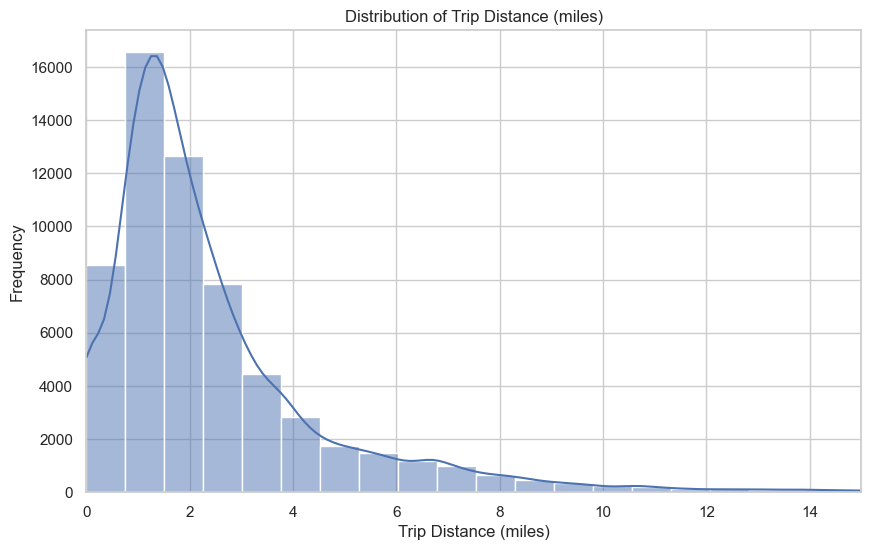

In [57]:
# Plot distribution of trip distances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=30, kde=True)
plt.title("Distribution of Trip Distance (miles)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 15)  # Limit to 15 miles for better visualization of typical trips
plt.show()


### Observations
Most Common Trip Distances:

1. The distribution peaks sharply between 0 and 2 miles, with the highest frequency of trips occurring around the 1-mile mark.
This suggests that the majority of taxi trips are relatively short distances, which is typical for intra-city travel.
2. Decline in Frequency with Distance:
There is a steep decline in the number of trips as the distance increases beyond 2 miles.
Very few trips exceed 5 miles, and trips longer than 10 miles are quite rare, almost negligible.
Long-Distance Trips as Outliers:
3. The graph shows a long tail, but only a small fraction of trips fall beyond 5 miles, indicating that long-distance rides are uncommon and likely represent outliers or specific use cases (such as airport trips or travel to suburban areas).

### Insights
Primary Use Case: The fact that most trips are within 1–2 miles suggests that taxis are mainly used for quick, short-distance trips, likely between nearby locations within the city.

Alignment with Duration Data: This pattern aligns well with the trip duration analysis, where most trips were under 15 minutes. The combination of short duration and distance points to quick, local commutes within a compact urban area.

Longer Trips as Exceptions: The few trips beyond 5 miles may be special cases, such as trips to transportation hubs, specific neighborhoods, or outlying areas. These could be further examined if they represent meaningful use cases or potential areas for expanded service.

# Analyze Fares and Tips
### Objective
The goal here is to examine the fare and tip distributions. Understanding the typical fare and tip amounts, as well as any unusually high or low values, can help identify trends in spending and tipping behavior.

Plot Distribution of Fare Amounts:

This will show the general range of fares and the most common amounts.

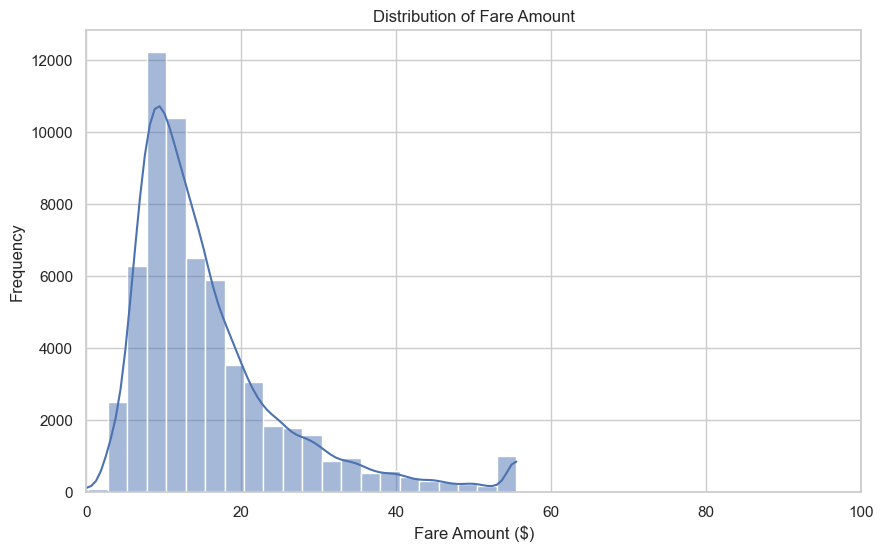

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of fare amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Limit to $100 for better visualization of typical fares
plt.show()


### Observations
1. Most Common Fare Range:
The majority of fares fall between $5 and $20, with a peak around $10. This range aligns well with the short distances observed in the trip distance analysis, indicating that these fares correspond to typical short trips within the city.
2. Long Tail for Higher Fares:
While the frequency sharply decreases after $20, there are still some fares extending beyond $40 and even up to $60. These higher fares are relatively rare and likely represent longer trips, possibly to locations farther from the city center, such as airports or suburban destinations.
3. Insight:
The concentration of fares around the $10 mark suggests that most taxi rides are affordable short-distance trips, which fits with the previous findings. The occasional higher fares highlight a few outliers or specific cases of longer journeys.

Plot Distribution of Tip Amounts:

This will reveal the tipping behavior of passengers, showing typical tip amounts and whether tipping is common.

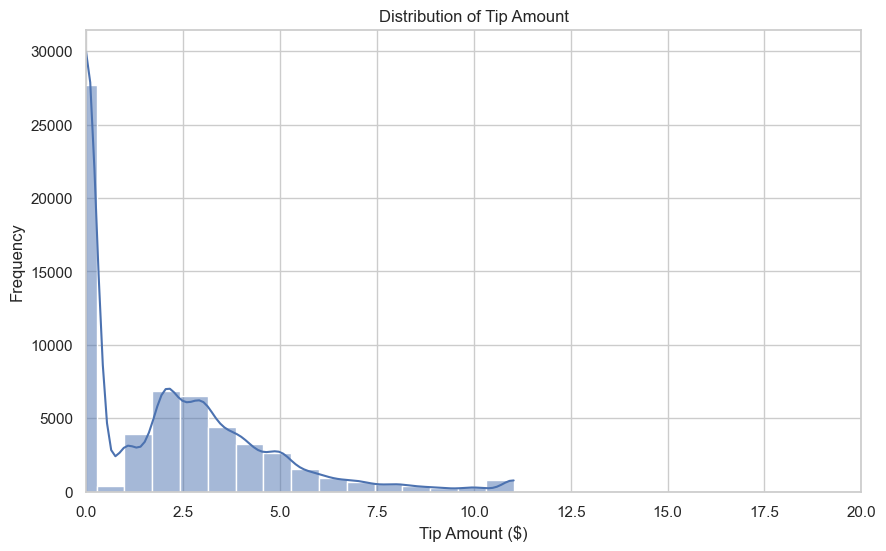

In [59]:
# Plot distribution of tip amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['tip_amount'], bins=30, kde=True)
plt.title("Distribution of Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 20)  # Limit to $20 for better visualization of typical tips
plt.show()


### Observations
1. High Frequency of Low or No Tips:
The majority of trips have very low or zero tips, as shown by the high frequency around $0. This suggests that a significant number of passengers either choose not to tip or tip very minimally.
2. Common Tip Range:
For trips that do include tips, the most common tip amounts range between $1 and $5. This is typical tipping behavior for small fares, reflecting standard tipping practices for short taxi rides.
3. Very Few High Tips:
There are very few tips exceeding $10, indicating that large tips are rare. When they do occur, they likely represent high-value trips or generous tipping behavior.
4. Insight:
The high frequency of no or low tips suggests that tipping is not consistent across rides, possibly due to different passenger behaviors or trip lengths. For the trips that do receive tips, the $1–$5 range is common, reflecting average tipping for low-to-moderate fare amounts.

### Insight
1. Typical Fare and Tip Ranges:
Most fares are between $5 and $20, which corresponds to short local trips. Most tips, when given, are between $1 and $5, aligning with standard tipping on these fares.
2. No or Low Tipping Behavior:
A significant number of trips have no tips, which could be explored further to understand whether tipping behavior varies based on fare amount, trip distance, or time of day.
3. Longer Trips with Higher Fares:
The occasional high fare (over $40) and tip (over $10) could indicate specific types of trips (e.g., airport transfers) or generous tipping on longer rides.

# Advanced Analysis Options
### Correlation Analysis
Objective: Investigate relationships between variables, such as:
Trip distance vs. fare: Check if longer distances correlate with higher fares.
Trip duration vs. tip amount: See if longer trips receive higher tips.

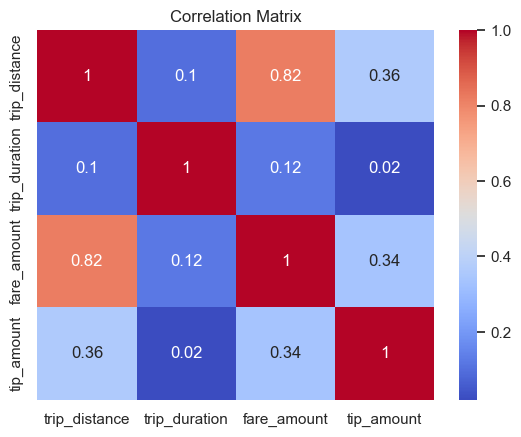

In [60]:
# Correlation matrix
correlation_matrix = data[['trip_distance', 'trip_duration', 'fare_amount', 'tip_amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Observations
1. Trip Distance and Fare Amount (Correlation: 0.82): There’s a strong positive correlation between trip distance and fare amount. This makes sense, as longer distances generally result in higher fares.

Insight: This suggests that fare pricing is largely distance-based, which aligns with typical taxi fare structures.

2. Trip Duration and Fare Amount (Correlation: 0.12):
The correlation between trip duration and fare amount is relatively low, indicating that duration does not significantly influence the fare in the same way as distance.

Insight: This may imply that the fare structure is more influenced by distance than by the time taken for a trip, which is typical for fixed-rate distance-based taxi services.

3. Trip Distance and Tip Amount (Correlation: 0.34):
There’s a moderate positive correlation between trip distance and tip amount. This suggests that longer trips tend to receive higher tips.

Insight: Passengers may be more inclined to tip on longer trips, possibly due to a higher fare or the perception of increased service.

4. Fare Amount and Tip Amount (Correlation: 0.34):
The correlation between fare amount and tip amount is also moderate, meaning that higher fares tend to be associated with higher tips, though not overwhelmingly so.

Insight: Passengers are likely tipping as a percentage of the fare, which would explain this relationship.

5. Trip Duration and Tip Amount (Correlation: 0.02):
There’s almost no correlation between trip duration and tip amount, indicating that the length of time for a trip does not significantly impact tipping behavior.

Insight: This aligns with the idea that passengers may be tipping based on fare or distance rather than time spent in the vehicle.

# Conclusion: NYC Taxi Demand Analysis

## 1. What are the Peak Times and Locations for Taxi Pickups?

### Peak Times:

Taxi demand is highest between 3 PM and 6 PM on weekdays, aligning with the evening commute. Demand begins to increase around 7 AM and rises steadily throughout the day, with Tuesdays being the busiest day. Lower demand on weekends suggests taxi usage is primarily work-related or for commuting.

### High-Demand Locations:

The top pickup locations reveal areas with consistently high demand, likely corresponding to transportation hubs, business districts, or dense residential neighborhoods. These locations should be prioritized for fleet allocation during peak times.

### Insight:
To optimize service, taxis should be more available in these high-demand locations during weekday afternoons, especially on Tuesdays.

---

## 2. How Does Trip Duration Vary by Time of Day?

### Trip Duration Patterns:

Trip durations are longer during peak commuting hours (morning and evening rush hours), likely due to traffic congestion. Midday and late evening trips are generally shorter, suggesting lower congestion and faster travel times during these periods.

### Typical Trip Length:

Most trips are relatively short, with durations under 15 minutes and distances around 1–2 miles. This indicates that NYC taxis are primarily used for short, local commutes.

### Insight:
Longer trip durations during peak hours imply that congestion impacts travel time. Taxi companies may consider adjusting pricing or promoting efficiency during off-peak hours to improve the passenger experience.

---

## 3. What are the Most Common Routes or Destinations?

### Popular Routes:

The most frequently traveled routes are between high-demand pickup and drop-off points, suggesting common commuting corridors or travel to major destinations, such as central business areas or transit hubs.

### Top Drop-off Locations:

Common drop-off locations align with high-demand destinations, including major landmarks, commercial zones, or residential neighborhoods with high population density.

### Insight:
Recognizing these common routes allows taxi services to strategically position vehicles along high-demand paths, optimizing availability during peak hours to better serve frequent travelers.

---

## Fare and Tip Distributions:

Most fares range between $5 and $20, aligning with the short-distance nature of most trips. Tips are generally low, with many trips receiving no tip. When tips are given, they typically fall between $1 and $5.

## Correlation Analysis:

A strong correlation between trip distance and fare amount confirms that fares are primarily distance-based. Tips show a moderate correlation with both fare and distance, suggesting that passengers are more likely to tip on longer or higher-fare trips.

## Insight:
Fare and tip patterns suggest that passengers generally tip based on fare size, and that fares are influenced more by distance than by time. This aligns with the short, local nature of typical taxi trips in the city.